In [182]:
import pandas
import seaborn as sns
import numpy
from matplotlib import pyplot as plt
sns.set_style()
%config InlineBackend.figure_format = 'retina'

In [2]:
origin_df = pandas.read_csv("/Users/sunxiaofei/Downloads/TableOfSpeedUp/Summary-Running Time (seconds) of NYTimes.csv")

In [3]:
origin_df.head()

,Method,Worker,25,23,22,21,20,19,18,17,...,9.14,9.1,9.07,9.06,9.05,9.04,9.032,9.025,9.0235,9.0225
0,Online,2,288.0,701.0,NaN,1094.0,NaN,1480.0,NaN,1870.0,...,20929.0,30235.0,40895.0,NaN,56785.0,71751.0,86632.0,111656.0,121764.0,NaN
1,Online,4,170.0,484.0,602.0,778.0,893.0,1059.0,1169.0,1335.0,...,14715.0,21177.0,30240.0,NaN,42265.0,53530.0,64944.0,84132.0,91875.0,NaN
2,Online,8,114.0,404.0,513.0,683.0,796.0,963.0,1074.0,1235.0,...,14465.0,26037.0,36991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Online,16,94.0,372.0,479.0,640.0,750.0,909.0,1016.0,1172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Online,32,76.0,357.0,466.0,627.0,731.0,884.0,989.0,1147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
data = []
columns = origin_df.columns[2:]
for line in origin_df.values:
    datum = [line[0], line[1]]
    for i, d in enumerate(line[2:]):
        if str(d) == "nan":
            continue
        try:
            d = float(d)
        except:
            continue
        if line[1] > 32:
            continue
        if float(columns[i]) < 10:
            continue
#         if not (10<float(columns[i])<16):
#             continue
        datum = [line[0], line[1], -1*float(columns[i]), d]
        data.append(datum)
df = pandas.DataFrame(data, columns=["Method", "Worker", "Perplexity", "Time"])
# df["Worker"] = df["Worker"].astype('category')

In [209]:
sns.lineplot?

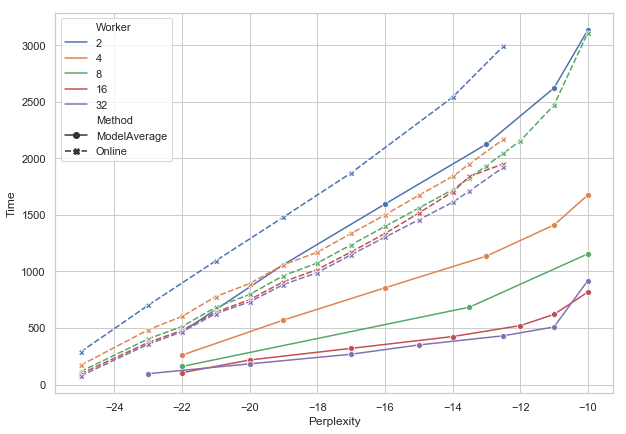

In [213]:
plt.figure(figsize=(10,7))
palette = sns.color_palette()[:5]
sns.lineplot(x="Perplexity", y="Time",
             hue="Worker", style="Method", markers=True, palette=palette,
             style_order=["ModelAverage", "Online"],
             data=df)
plt.show()

/Users/sunxiaofei/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


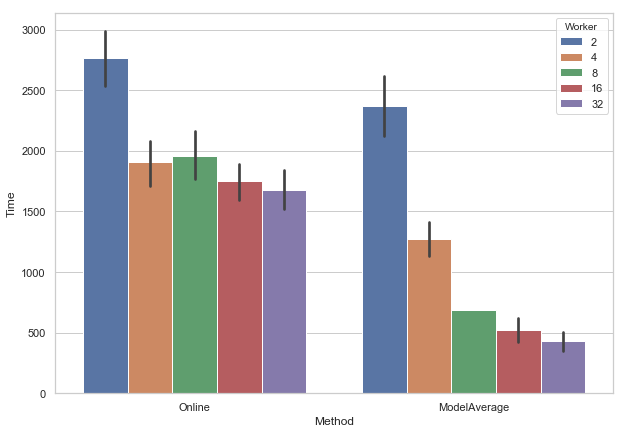

In [198]:
plt.figure(figsize=(10,7))
sns.barplot(x="Method", y="Time", hue="Worker", data=df[df["Time"]<15000])
plt.show()

In [200]:
df = pandas.read_csv("./data/partial_time.csv")

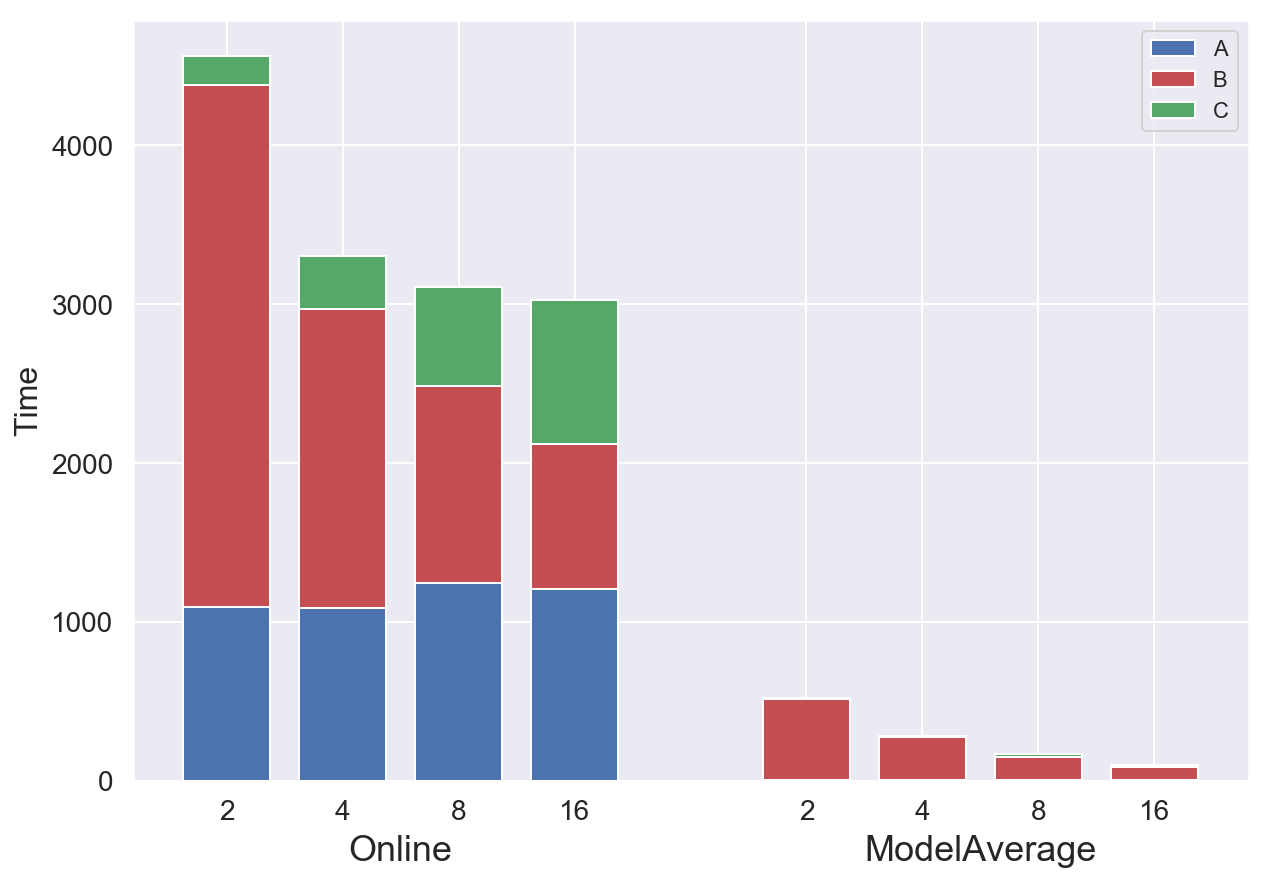

In [201]:
# plt.figure()
fig, ax = plt.subplots(figsize=(10,7))
# newax = ax.twiny()
N=4
ind = np.arange(N)    # the x locations for the groups
ind = list(ind)+list(ind+N+1)
width = 0.75       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, df["A"], width,  color = "b")
p2 = plt.bar(ind, df["B"], width, bottom=df["A"].values, color = "r")
p3 = plt.bar(ind, df["C"], width, bottom=df["A"]+df["B"].values, color = "g")


plt.ylabel('Time', fontsize=16)
# plt.title('Title', fontsize=18)
plt.xticks(ind, df["Workers"], fontsize=14)

plt.yticks(fontsize=14)
# plt.grid()
plt.legend((p1[0], p2[0], p3[0]), ('A', 'B', 'C'))
ax.text(1.5, -500, "Online", fontsize=18, horizontalalignment='center')
ax.text(6.5, -500, "ModelAverage", fontsize=18, horizontalalignment='center')

plt.show()

In [202]:
df["A"]=np.log(df["A"])
df["B"]=np.log(df["B"])
df["C"]=np.log(df["C"])

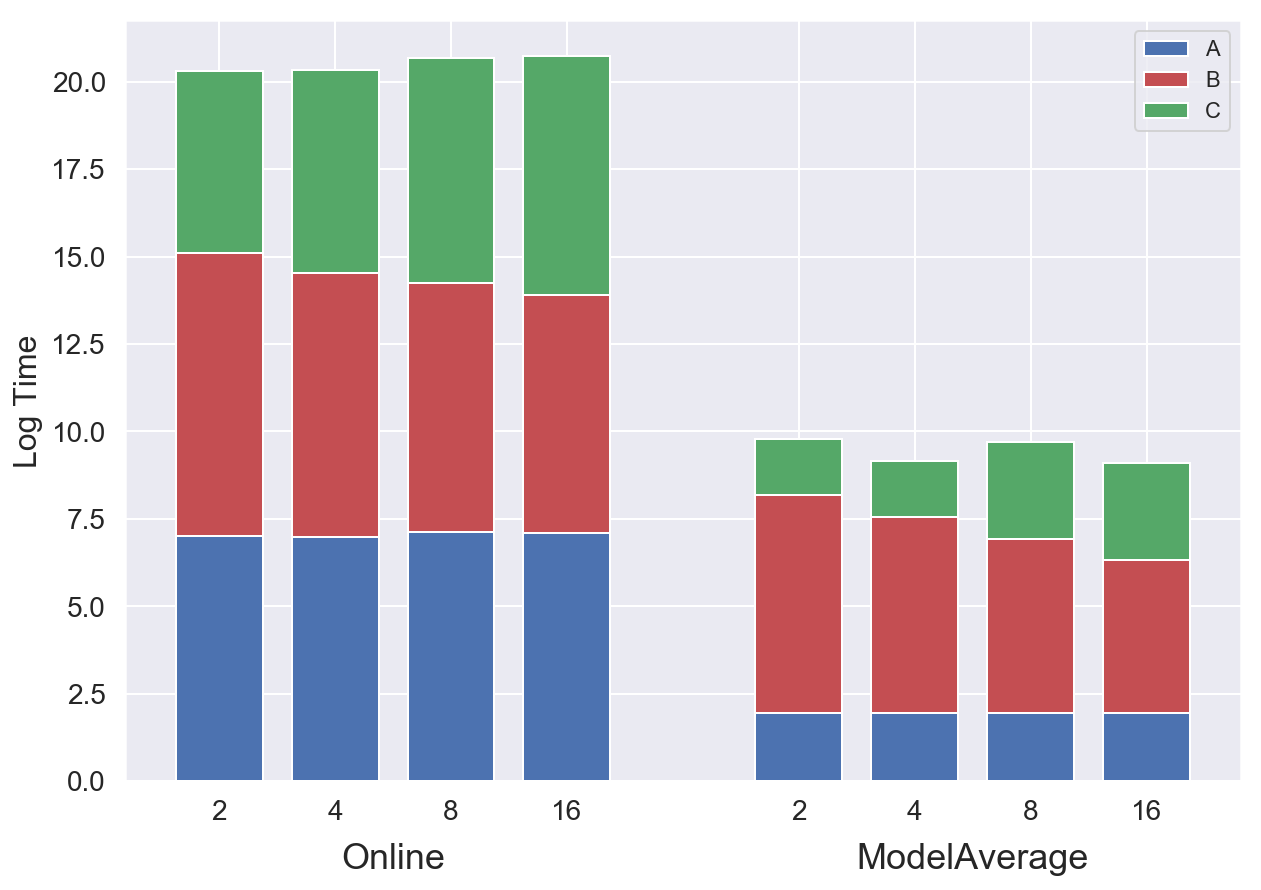

In [204]:
# plt.figure()
fig, ax = plt.subplots(figsize=(10,7))
# newax = ax.twiny()
N=4
ind = np.arange(N)    # the x locations for the groups
ind = list(ind)+list(ind+N+1)
width = 0.75       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, df["A"], width,  color = "b")
p2 = plt.bar(ind, df["B"], width, bottom=df["A"].values, color = "r")
p3 = plt.bar(ind, df["C"], width, bottom=df["A"]+df["B"].values, color = "g")


plt.ylabel('Log Time', fontsize=16)
# plt.title('Title', fontsize=18)
plt.xticks(ind, df["Workers"], fontsize=14)

plt.yticks(fontsize=14)
# plt.grid()
plt.legend((p1[0], p2[0], p3[0]), ('A', 'B', 'C'))
ax.text(1.5, -2.5, "Online", fontsize=18, horizontalalignment='center')
ax.text(6.5, -2.5, "ModelAverage", fontsize=18, horizontalalignment='center')

plt.show()

In [168]:
ax.text?

/Users/sunxiaofei/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


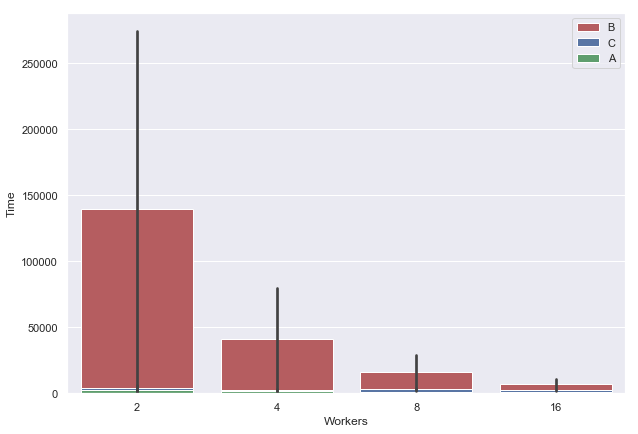

In [80]:
plt.figure(figsize=(10,7))
sns.barplot(x="Workers", y="B", data=df, color="r", label="B")
sns.barplot(x="Workers", y="C", data=df, color="b", label="C")
sns.barplot(x="Workers", y="A", data=df, color="g", label="A")
plt.legend()
plt.ylabel("Time")
plt.show()

In [86]:
import numpy as np

In [179]:
%config InlineBackend.figure_format = 'retina'


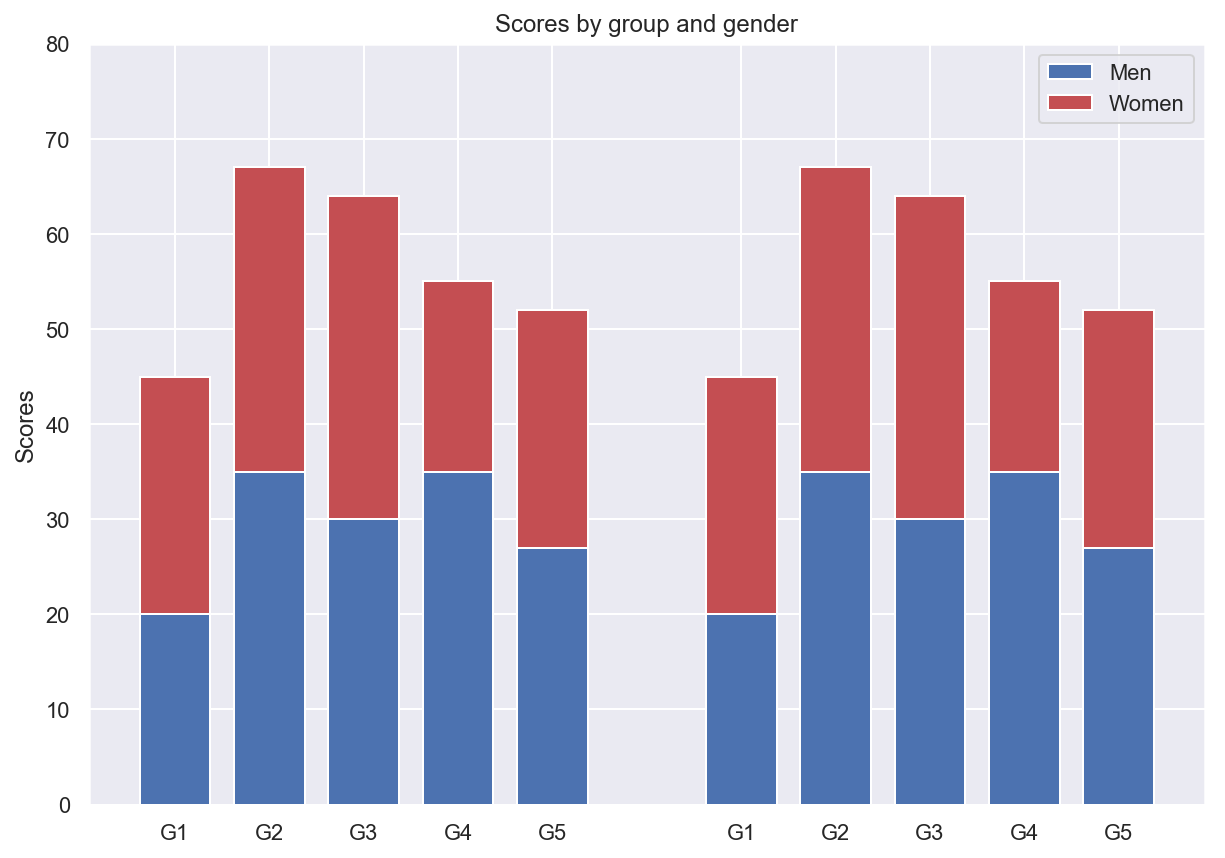

In [180]:
plt.figure(figsize=(10,7))
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N)    # the x locations for the groups
width = 0.75       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width,  color = "b")
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans, color = "r")
p3 = plt.bar(ind+6, menMeans, width, color = "b")
p4 = plt.bar(ind+6, womenMeans, width, bottom=menMeans, color = "r")


plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(list(ind)+list(ind+6), ('G1', 'G2', 'G3', 'G4', 'G5', 'G1', 'G2', 'G3', 'G4', 'G5'))

plt.yticks(np.arange(0, 81, 10))
plt.grid()
plt.grid()
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()